# Exploratoy analysis of unkown star cluster

We are going to explore the star population of the region of interest by analysing *Gaia* data. *Gaia* Data Release 2 provides high-precision astrometry and three-band photometry for about 1.3 billion sources over the full sky. Theprecision, accuracy, and homogeneity of both astrometry and photometry are unprecedented. To obtain the data we will use the astroquery TAP+ protocol. More information can be found here: https://astroquery.readthedocs.io/en/latest/

In [1]:
from astroquery.gaia import Gaia
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import ascii

import pandas as pd

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (18.0, 10.0)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
ra0 = 130.025
de0 = 19.98333
coord = SkyCoord(ra=ra0, dec=de0, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(3, u.deg)
height = u.Quantity(2, u.deg)
%time r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO: Query finished. [astroquery.utils.tap.core]
CPU times: user 13.2 s, sys: 184 ms, total: 13.3 s
Wall time: 34.2 s


### Convert to pandas DataFrame and initial exploration of the dataset

We will work with a pandas DataFrame, for being an easy tabular format. We will start by adding a column with the distance in kpc, computed from the parallax in milliarcseconds.

In [3]:
data = r.to_pandas()
data['distance'] = 1.0/data['parallax']
data

/home/jmoldon/miniconda3/envs/test/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2878: TableReplaceWarning: converted column 'priam_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/jmoldon/miniconda3/envs/test/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2878: TableReplaceWarning: converted column 'flame_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,dist,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,distance
0,0.009802,1635721458409799680,b'Gaia DR2 661322846442390784',661322846442390784,390503307,2015.5,130.015005,0.248881,19.980541,0.193851,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',1.206670
1,0.013414,1635721458409799680,b'Gaia DR2 661322953818940160',661322953818940160,350513172,2015.5,130.016021,0.105317,19.993747,0.068837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',2.339996
2,0.016757,1635721458409799680,b'Gaia DR2 661322919458270080',661322919458270080,1520423091,2015.5,130.008090,18.646404,19.988621,11.796212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',NaN
3,0.017763,1635721458409799680,b'Gaia DR2 661322129182111232',661322129182111232,1348785594,2015.5,130.039527,0.494142,19.971954,0.369152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.640337
4,0.018220,1635721458409799680,b'Gaia DR2 661322090528141568',661322090528141568,1417274752,2015.5,130.021480,0.255773,19.965408,0.176424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',1.767543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,1.714573,1635721458409799680,b'Gaia DR2 661860473268060032',661860473268060032,703312001,2015.5,131.523122,0.696914,20.968275,0.478415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',-7.051204
30326,1.716012,1635721458409799680,b'Gaia DR2 661047594874045696',661047594874045696,1141285327,2015.5,131.516276,0.272562,18.999212,0.154463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',-5.330887
30327,1.717709,1635721458409799680,b'Gaia DR2 662738643758017536',662738643758017536,390421460,2015.5,128.528345,0.534061,19.003505,0.307096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',3.440740
30328,1.724373,1635721458409799680,b'Gaia DR2 661047354355879296',661047354355879296,767876425,2015.5,131.515584,0.077613,18.983878,0.047253,...,200111.0,0.636425,0.488395,0.677318,0.129163,0.109751,0.148575,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.683142


More information on the column name meaning, units and more details can be found in http://cdsarc.u-strasbg.fr/ftp/I/345/ReadMe

In [4]:
# Count the number of entries
data.count()

dist                    30330
solution_id             30330
designation             30330
source_id               30330
random_index            30330
                        ...  
lum_percentile_lower     4318
lum_percentile_upper     4318
datalink_url            30330
epoch_photometry_url    30330
distance                25337
Length: 98, dtype: int64

# Some numerical values to summarize the columns

In [5]:
data.describe()

,dist,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,distance
count,30330.000000,3.033000e+04,3.033000e+04,3.033000e+04,30330.0,30330.000000,30330.000000,30330.000000,30330.000000,25337.000000,...,5053.000000,5053.000000,4318.0,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000,25337.000000
mean,0.926044,1.635721e+18,6.625714e+17,8.481437e+08,2015.5,130.015400,1.854095,19.976328,1.070778,1.022348,...,0.097709,0.263006,200111.0,1.397740,1.281509,1.488634,4.140486,3.617357,4.663615,0.166190
std,0.364550,0.000000e+00,1.566766e+15,4.907570e+08,0.0,0.864883,5.116695,0.574201,2.918166,1.569493,...,0.141129,0.213469,0.0,3.233030,2.986711,3.329456,44.876537,40.223827,49.658024,126.621830
min,0.009802,1.635721e+18,6.596981e+17,1.996900e+04,2015.5,128.525007,0.018194,18.983352,0.011679,-12.538883,...,0.000000,0.007100,200111.0,0.500969,0.313949,0.513331,0.030905,0.030151,0.031660,-13671.029870
25%,0.659723,1.635721e+18,6.612667e+17,4.222359e+08,2015.5,129.266310,0.127751,19.484145,0.078967,0.271126,...,0.007900,0.107100,200111.0,0.720208,0.648146,0.763561,0.256345,0.214092,0.296318,0.368741
50%,0.947206,1.635721e+18,6.618324e+17,8.466956e+08,2015.5,130.012563,0.398032,19.976029,0.243634,0.745938,...,0.041700,0.200700,200111.0,0.937876,0.855817,1.002790,0.667259,0.584672,0.758724,0.902737
75%,1.212239,1.635721e+18,6.643895e+17,1.278397e+09,2015.5,130.762424,1.011944,20.469638,0.617917,1.485823,...,0.125500,0.351800,200111.0,1.269365,1.156431,1.379006,1.830126,1.586210,2.058991,1.769543
max,1.727997,1.635721e+18,6.648629e+17,1.692899e+09,2015.5,131.524907,92.941017,20.983283,56.658432,23.376402,...,1.238700,1.553000,200111.0,150.389877,136.227798,151.835205,2420.168213,2245.128906,2595.207520,3075.737473


We can also check the mean and range values of some columns, like the Right Ascension and Declination, both in degrees. We will use the min and max values later.

In [6]:
location_limits = data.agg({'ra' : ['mean', 'min', 'max'], 'dec' : ['mean', 'min', 'max']})
location_limits

,ra,dec
mean,130.015400,19.976328
min,128.525007,18.983352
max,131.524907,20.983283


### Sky distribution of the stars by flux

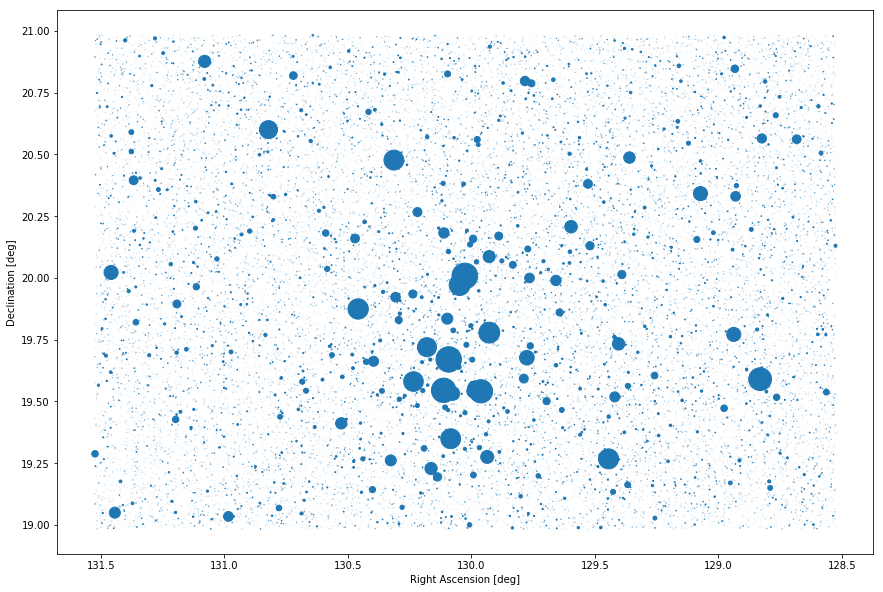

In [7]:
fig, ax = plt.subplots(ncols=1, figsize=(15,10))
ax.scatter(data['ra'], data['dec'], s=data['phot_g_mean_flux']/1e5);
ax.set_aspect('equal')

# Here we invert the direction of the right ascension axis
ax.invert_xaxis()

ax.set_xlabel('Right Ascension [deg]')
ax.set_ylabel('Declination [deg]');

### We may want to explore any of the other variables present in the dataset

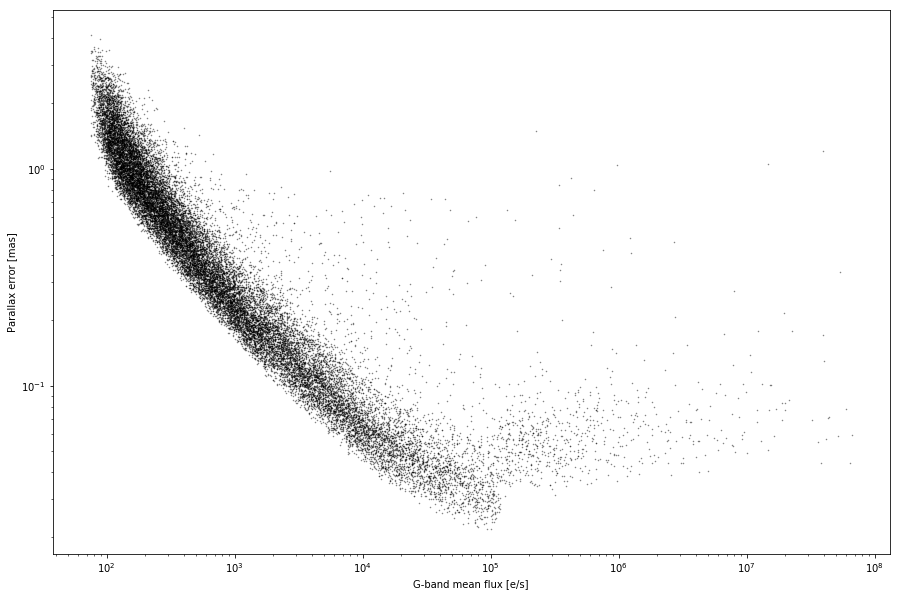

In [8]:
fig, ax = plt.subplots(ncols=1, figsize=(15,10))

ax.plot(data['phot_g_mean_flux'], data['parallax_error'], '.k', ms=1, alpha=0.5)
ax.loglog()
ax.set_xlabel('G-band mean flux [e/s]')
ax.set_ylabel('Parallax error [mas]');

### We will explore the parallax distribution

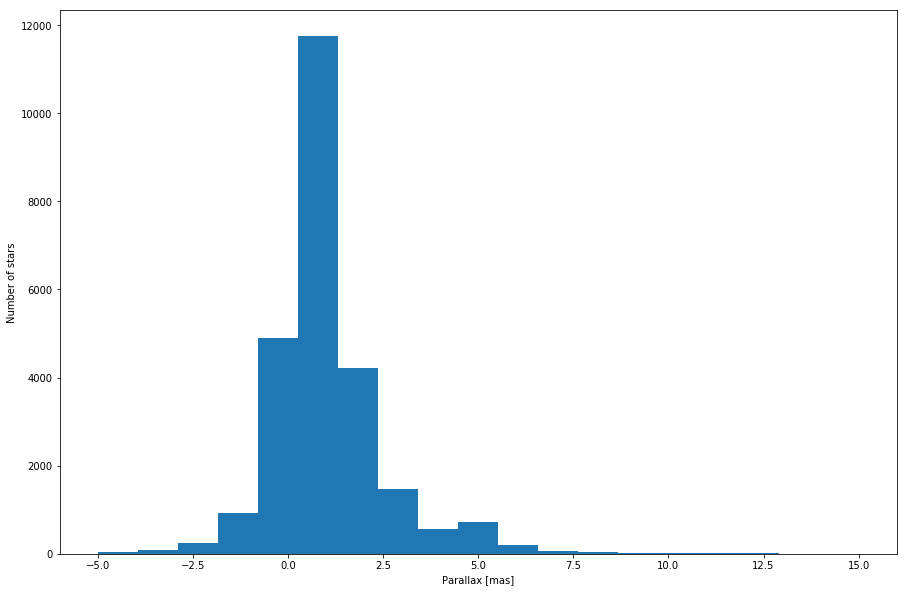

In [9]:
fig, ax = plt.subplots(ncols=1, figsize=(15,10))
ax.hist(data['parallax'], bins=np.linspace(-5, 15, 20));
ax.set_xlabel('Parallax [mas]')
ax.set_ylabel('Number of stars');

First of all we see that there are negative parallaxes, which doesn't have physical meaning, but are a consequence of errors in the parallax determination.

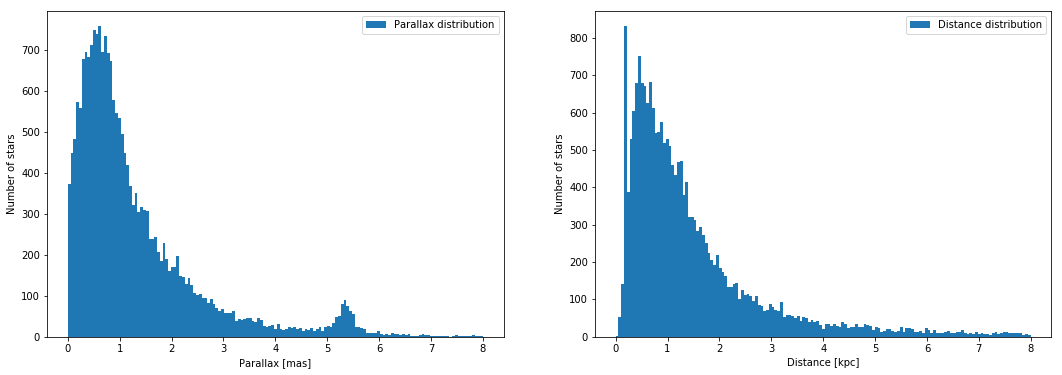

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(18,6))
ax[0].hist(data['parallax'], bins=np.linspace(0, 8, 150), label='Parallax distribution')
ax[1].hist(data['distance'], bins=np.linspace(0, 8, 150), label='Distance distribution')

ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Parallax [mas]')
ax[0].set_ylabel('Number of stars');
ax[1].set_xlabel('Distance [kpc]')
ax[1].set_ylabel('Number of stars');

We see a very interesting accummulation of stars at a parallax of approximately 5.2 mas. We can create a filter to select the start in that particular range. We will overplot the distribution of the whole sample and the one of the selected group.

In [11]:
selection = (data['parallax'] > 4.8) & (data['parallax'] < 6.0)
cluster = data[selection]

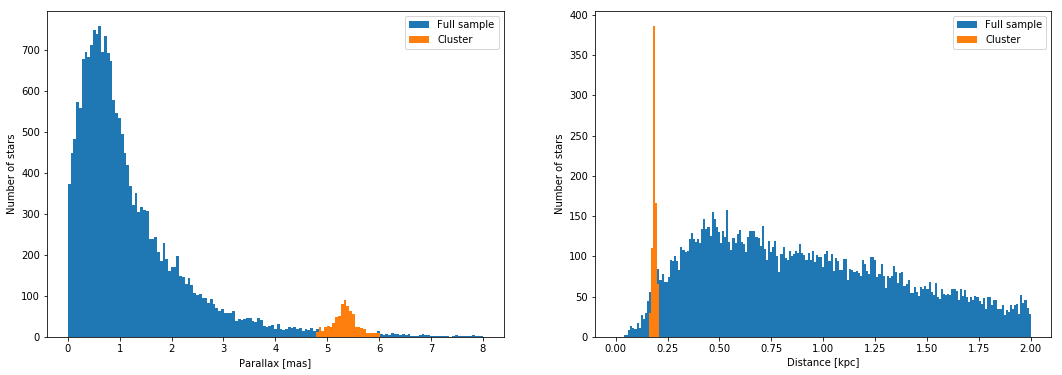

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(18,6))
ax[0].hist(data['parallax'], bins=np.linspace(0, 8, 150), label='Full sample')
ax[0].hist(cluster['parallax'], bins=np.linspace(0, 8, 150), label='Cluster')

ax[1].hist(data['distance'], bins=np.linspace(0, 2, 200), label='Full sample')
ax[1].hist(cluster['distance'], bins=np.linspace(0, 2, 200), label='Cluster')

ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Parallax [mas]')
ax[0].set_ylabel('Number of stars');
ax[1].set_xlabel('Distance [kpc]')
ax[1].set_ylabel('Number of stars');

ax[0].legend()
ax[1].legend();

# Analysis of the relevant cluster

We plot the distribution of start in the sky. First, all the stars in the sample are plotted in grey. The stars of the cluster and plotted in color, with the colorscale representing the distance from the Earth in pc.

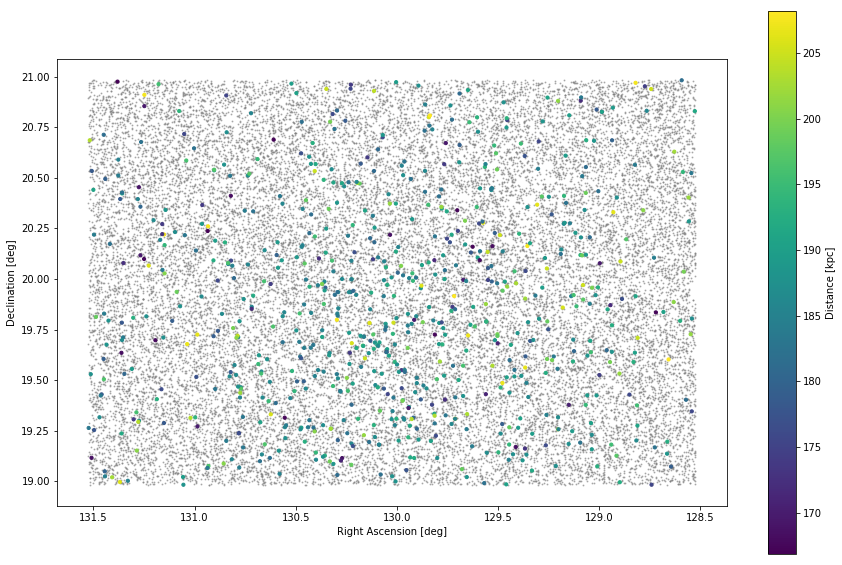

In [13]:
fig, ax = plt.subplots(ncols=1, figsize=(15,10))
ax.set_aspect('equal')
ax.scatter(data['ra'], data['dec'], c='gray', s=1, alpha=0.5);
l = ax.scatter(cluster['ra'], cluster['dec'], c=cluster['distance']*1000., s=10);

ax.set_xlabel('Right Ascension [deg]')
ax.set_ylabel('Declination [deg]');

# Here we invert the direction of the right ascension axis
ax.invert_xaxis()

cb = fig.colorbar(l);
cb.set_label('Distance [kpc]')


 There is not apparent pattern of the selected stars, and they don't seem to cluster in a particular region, although there seems to be an overdensity at the center, specially in Right Ascension.

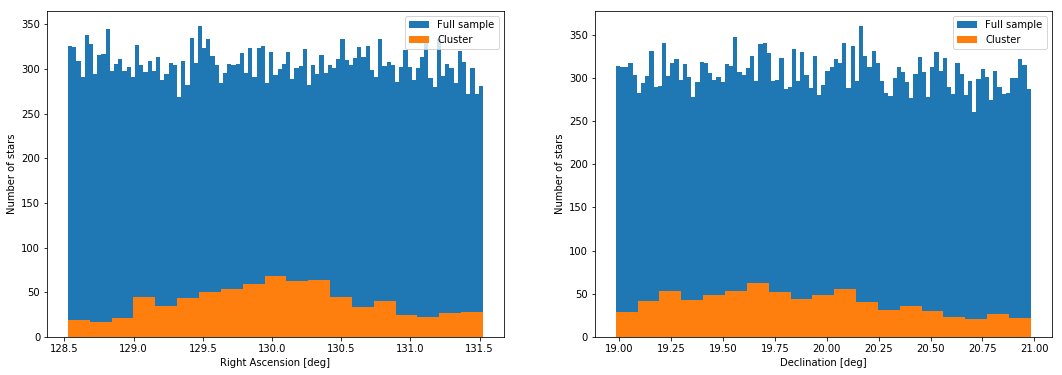

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(18,6))

ax[0].hist(data['ra'],    bins=np.linspace(location_limits['ra']['min'], location_limits['ra']['max'], 100), label='Full sample')
ax[0].hist(cluster['ra'], bins=np.linspace(location_limits['ra']['min'], location_limits['ra']['max'], 20), label='Cluster')

ax[1].hist(data['dec'],    bins=np.linspace(location_limits['dec']['min'], location_limits['dec']['max'], 100), label='Full sample')
ax[1].hist(cluster['dec'], bins=np.linspace(location_limits['dec']['min'], location_limits['dec']['max'], 20), label='Cluster')

ax[0].set_xlabel('Right Ascension [deg]')
ax[0].set_ylabel('Number of stars');
ax[1].set_xlabel('Declination [deg]')
ax[1].set_ylabel('Number of stars');

ax[0].legend()
ax[1].legend();


# Velocity distribution analysis

We will try to find some clustering pattern in the velocity space. These are the variables:

Proper motion in right ascension is $\mu_{\alpha}\cos\delta$  
Proper motion in declination is $\mu_{\delta}$  
Spectroscopic radial velocity in the solar barycentric reference frame is $v_{r}$  


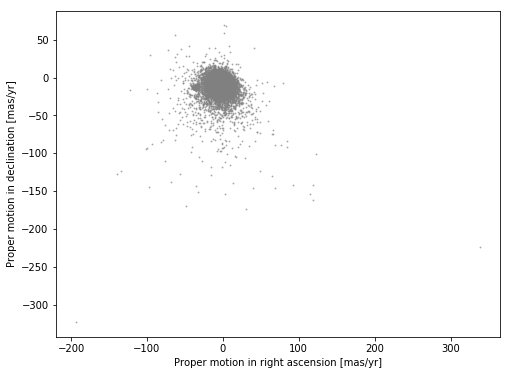

In [15]:
fig, ax = plt.subplots(ncols=1, figsize=(18,6))
ax.scatter(data['pmra'], data['pmdec'], c='gray', s=1, alpha=0.5);
ax.set_aspect('equal')

ax.set_xlabel('Proper motion in right ascension [mas/yr]')
ax.set_ylabel('Proper motion in declination [mas/yr]');

There may be some clustering! But with this scale it is difficult to separate it. Some options would be to use smaller symbols or with more transparency. We will limit the plotting range to avoid the outliers and focus on the central region. We will also overplot the stars from the selected cluster

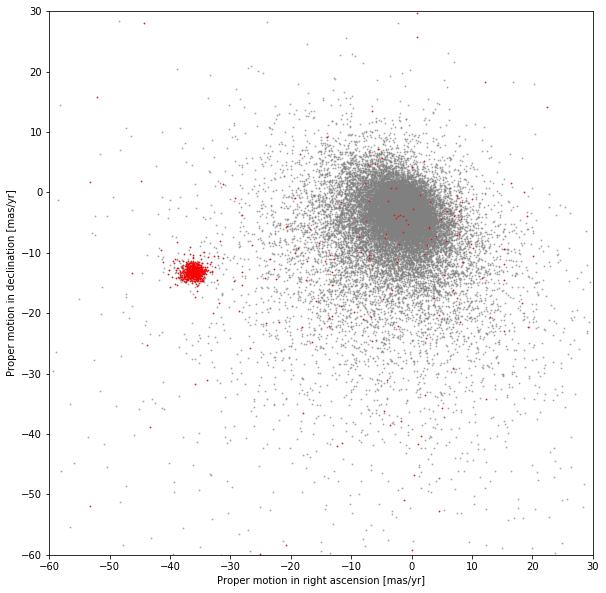

In [16]:
fig, ax = plt.subplots(ncols=1, figsize=(18,10))
ax.scatter(data['pmra'], data['pmdec'], c='gray', s=1, alpha=0.5);
plt.plot(cluster['pmra'], cluster['pmdec'], '.r', ms=1)

ax.set_aspect('equal')

ax.set_xlabel('Proper motion in right ascension [mas/yr]')
ax.set_ylabel('Proper motion in declination [mas/yr]')

ax.set_xlim(-60, 30)
ax.set_ylim(-60, 30);



Great, this is much clearer! The cluster is a moving group, where all the stars have a very similar 2D velocity, even if they are scattered in a wide region of the sky of several degrees. This indicate that the cluster of stars, probably very young, were formed at a similar time from a single gas cloud, so on average they have the same space velocity as the original cloud.

We can also plot the radial velocity, although the information is much more limited and only stars that are very close, or very bright will have measurements. Therefore, we are biased because most of the stars in our cluster will have good measurements. We can see that the cluster is very well defined in the 3D velocity as well.

In [17]:
# Counting the number of stars with valid measurements
data[['pmra', 'pmdec', 'radial_velocity']].count()

pmra               25337
pmdec              25337
radial_velocity      596
dtype: int64

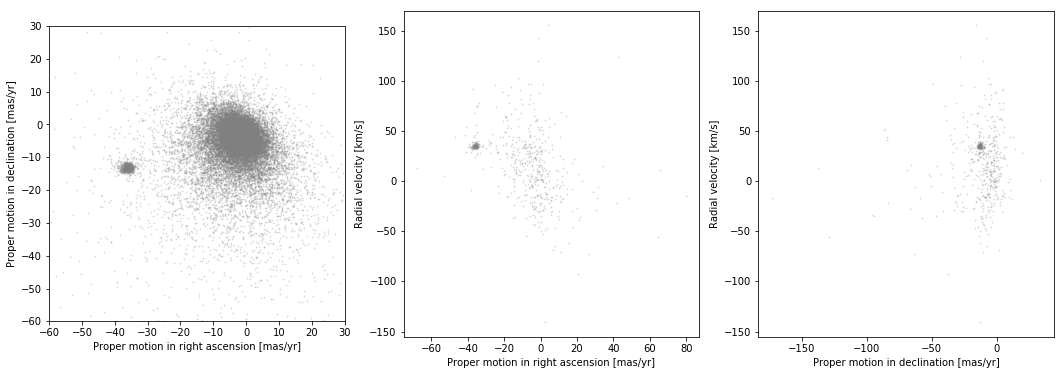

In [18]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))
ax[0].scatter(data['pmra'], data['pmdec'], c='gray', s=1, alpha=0.2);
ax[1].scatter(data['pmra'], data['radial_velocity'],  c='gray', s=1, alpha=0.2);
ax[2].scatter(data['pmdec'], data['radial_velocity'], c='gray', s=1, alpha=0.2);

ax[0].set_xlabel('Proper motion in right ascension [mas/yr]')
ax[0].set_ylabel('Proper motion in declination [mas/yr]')
ax[1].set_xlabel('Proper motion in right ascension [mas/yr]')
ax[1].set_ylabel('Radial velocity [km/s]')
ax[2].set_xlabel('Proper motion in declination [mas/yr]')
ax[2].set_ylabel('Radial velocity [km/s]');

ax[0].set_aspect('equal')

ax[0].set_xlim(-60, 30)
ax[0].set_ylim(-60, 30);

### Distribution of stars from the cluster in velocity

We can plot some histograms to see this distribution

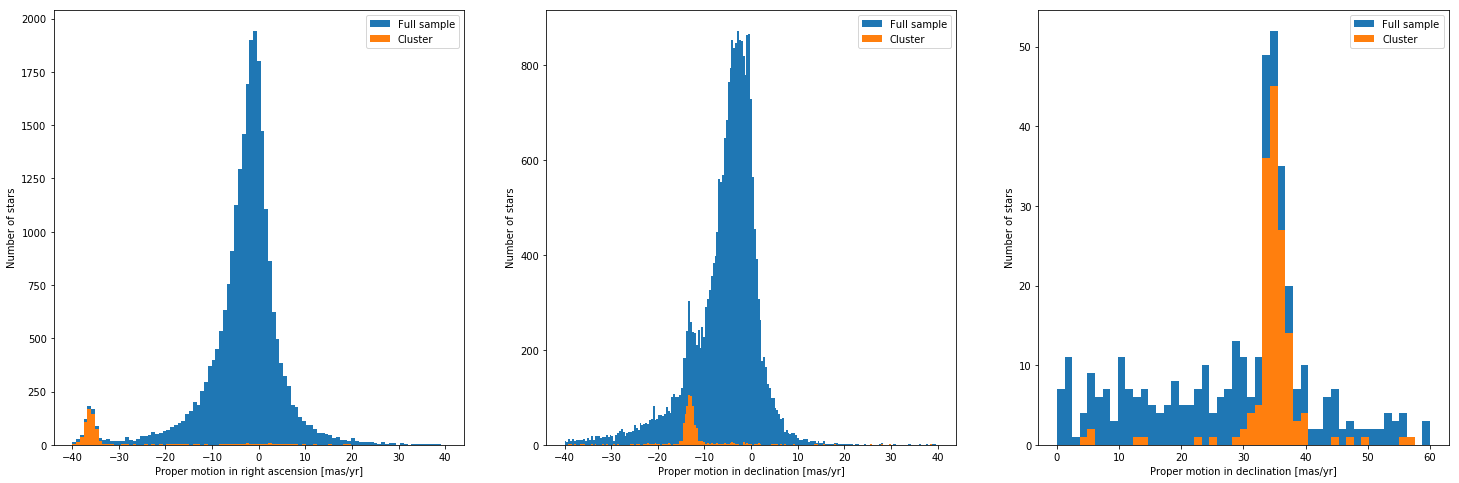

In [19]:
fig, ax = plt.subplots(ncols=3, figsize=(25,8))
ax[0].hist(data['pmra'], bins=np.linspace(-40, 40, 100), label='Full sample')
ax[0].hist(cluster['pmra'], bins=np.linspace(-40, 40, 100), label='Cluster')
ax[1].hist(data['pmdec'], bins=np.linspace(-40, 40, 200), label='Full sample')
ax[1].hist(cluster['pmdec'], bins=np.linspace(-40, 40, 200), label='Cluster')
ax[2].hist(data['radial_velocity'], bins=np.linspace(0, 60, 50), label='Full sample')
ax[2].hist(cluster['radial_velocity'], bins=np.linspace(0, 60, 50), label='Cluster')

ax[0].set_xlabel('Proper motion in right ascension [mas/yr]')
ax[0].set_ylabel('Number of stars');
ax[1].set_xlabel('Proper motion in declination [mas/yr]')
ax[1].set_ylabel('Number of stars');
ax[2].set_xlabel('Proper motion in declination [mas/yr]')
ax[2].set_ylabel('Number of stars');

ax[0].legend()
ax[1].legend();
ax[2].legend();

# Conclusions

Here we finish our exploratory analysis. We have found a very clear star cluster, filtered manually based on distance (from parallax) and identified by eye in the velocity plots. Given the clear signature of the cluster, we can measure average values:


In [20]:
ra = cluster['ra'].median()
dec = cluster['dec'].median()
distance = cluster['distance'].median()*1000.
print('Right Ascension: {0:7.3f} deg'.format(ra))
print('Declination:     {0:7.3f} deg'.format(dec))
print('Distance:        {0:7.3f} pc'.format(distance))


Right Ascension: 130.024 deg
Declination:      19.816 deg
Distance:        187.132 pc


With this information we can see that this is the [Beehive Cluster](https://en.wikipedia.org/wiki/Beehive_Cluster), M44, also known as Praesepe. 

From wikipedia:

> <p>The <b>Beehive Cluster</b> (also known as <b>Praesepe</b> (Latin for "manger"), <b>M44</b>, <b>NGC 2632</b>, or <b>Cr 189</b>), is an open cluster in the constellation Cancer. It is one of the nearest open clusters to Earth, containing a larger population of stars than other nearby bright open clusters. Under dark skies, the Beehive Cluster looks like a small nebulous object to the naked eye; as known since ancient times. Classical astronomer Ptolemy described it as "nebulous mass in the breast of Cancer", and it was <b>among the first objects that Galileo studied with his telescope</b>. [...] In 1609, Galileo first telescopically observed the Beehive and was able to resolve it into 40 stars
    
We can actually display here the wikipedia page.

In [21]:
%%html
<iframe src="https://en.wikipedia.org/wiki/Beehive_Cluster" width="1200" height="600"></iframe>

# Potential continuation 1: identification of cluster members

The star cluster is very clear and members can be identified with some confidence by using the distance, as we have seen. However, that selection criteria is very poor, so many outliers contaminate the sample and we may be missing members that don't have good distance measurement. A more accurate selection criteria need to be applied to filter outlier stars. There are different machine learning clustering algorithms that could be used.

Some references:

- [A GaiaDR2 view of the open cluster population in the Milky Way](https://www.aanda.org/articles/aa/pdf/2018/10/aa33476-18.pdf)
- [Open cluster kinematics with Gaia DR2](https://www.aanda.org/articles/aa/pdf/2018/11/aa34020-18.pdf)
- [A sextet of clusters in the Vela OB2 region revealed by Gaia](https://arxiv.org/pdf/1807.07073.pdf)

# Potential continuation 2: analysis of stellar evolution with the Hertzsprung-Russell diagram

It would be interesting to study the cluster physical properties using the *Gaia* photometry that we already have. This, combined with accurate distance determination and stellar evolution models, would allow us to measure the age of the cluster.

Some references:
- [Gaia Data Release 2: Observational Hertzsprung-Russell diagrams](https://arxiv.org/pdf/1804.09378.pdf)

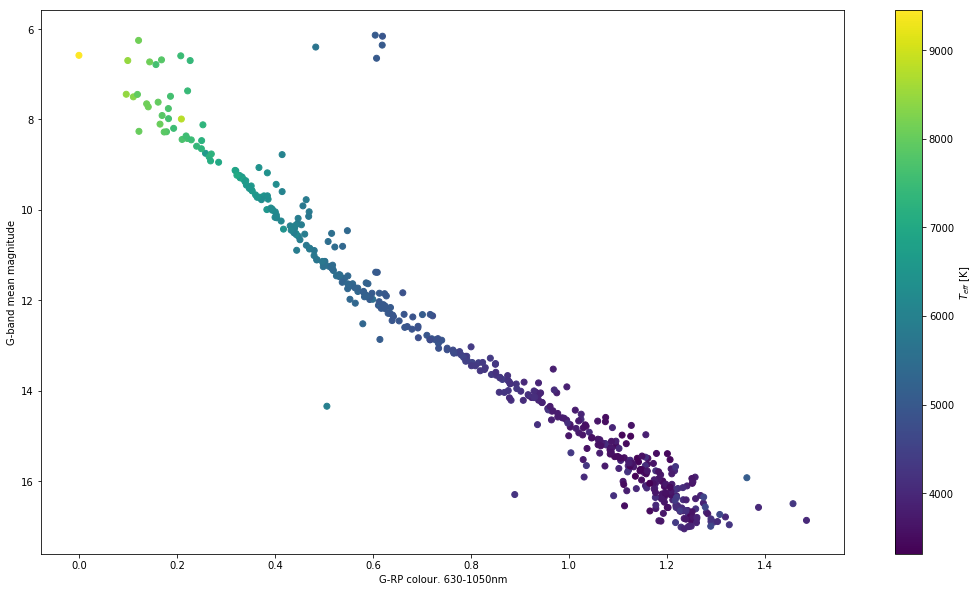

In [22]:
fig, ax = plt.subplots(ncols=1, figsize=(18,10))
l = plt.scatter(cluster['g_rp'], cluster['phot_g_mean_mag'], c=cluster['teff_val'])

ax.set_xlabel('G-RP colour. 630-1050nm')
ax.set_ylabel('G-band mean magnitude')
ax.invert_yaxis()

cb = fig.colorbar(l)
cb.set_label("$T_{eff}$ [K]")